In [ ]:
import pandas as pd # for data manipulation
import matplotlib.pylab as plt  # for data visualization
import numpy as np # for numerical operations

In [ ]:
data = pd.read_csv("<Path of Crime Dataset>//crime_data.csv")# loading the dataset

In [ ]:
data.info() # Checking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
data.rename({'Unnamed: 0' : 'State'}, axis=1, inplace=True) # renaming the unnamed column

In [ ]:
data.isna().sum() # Checking for null values

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [ ]:
data.describe() # checking statistical details of the data

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [ ]:
# Normalization function
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [ ]:
df_norm = norm_func(data.iloc[:,1:])

In [ ]:
df_norm.describe() # Checking data after normalization

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.420964,0.430685,0.568475,0.360000
std,0.262380,0.285403,0.245335,0.242025
min,0.000000,0.000000,0.000000,0.000000
25%,0.197289,0.219178,0.381356,0.200904
50%,0.388554,0.390411,0.576271,0.330749
75%,0.629518,0.698630,0.775424,0.487726
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
import scipy.cluster.hierarchy as sch # calling hierarchical clustering function

In [ ]:
z = sch.linkage(df_norm, method = "complete", metric = "euclidean")

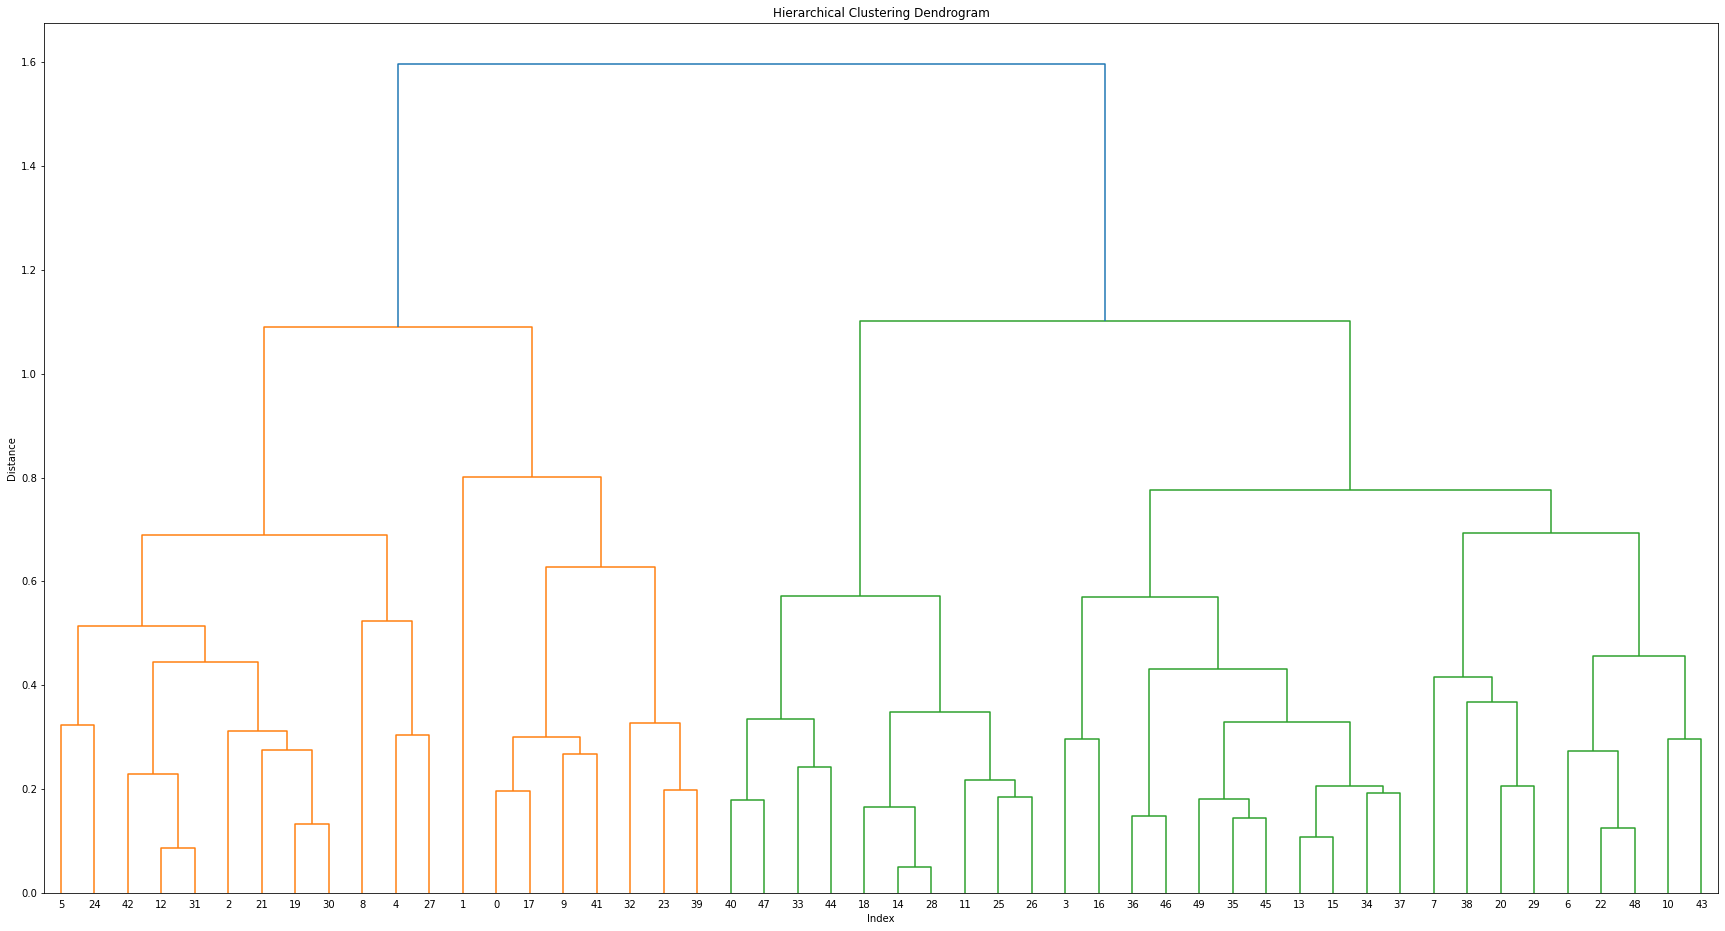

In [ ]:
# Dendrogram
plt.figure(figsize=(30, 16));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z, 
    leaf_rotation = 0,  # rotates the x axis labels
    leaf_font_size = 10 # font size for the x axis labels
)
plt.show()


In [ ]:
# Now applying AgglomerativeClustering choosing 4 as clusters from the above dendrogram
from sklearn.cluster import AgglomerativeClustering
h_complete = AgglomerativeClustering(n_clusters = 4, linkage = 'complete', affinity = "euclidean").fit(df_norm) 
h_complete.labels_
cluster_labels = pd.Series(h_complete.labels_)

In [ ]:
data['Clust'] = cluster_labels # creating a new column
data.head()

,State,Murder,Assault,UrbanPop,Rape,Clust
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3


In [ ]:
data['Total'] = data.iloc[:,1:5].sum(axis=1) # summing up all the crime numbers for all the states
data.head()

,State,Murder,Assault,UrbanPop,Rape,Clust,Total
0,Alabama,13.2,236,58,21.2,0,328.4
1,Alaska,10.0,263,48,44.5,0,365.5
2,Arizona,8.1,294,80,31.0,3,413.1
3,Arkansas,8.8,190,50,19.5,1,268.3
4,California,9.0,276,91,40.6,3,416.6


In [ ]:
data=data.iloc[:,[5,0,1,2,3,4,6]] # rearranging the columns to make the interpretation easier
data.head()

,Clust,State,Murder,Assault,UrbanPop,Rape,Total
0,0,Alabama,13.2,236,58,21.2,328.4
1,0,Alaska,10.0,263,48,44.5,365.5
2,3,Arizona,8.1,294,80,31.0,413.1
3,1,Arkansas,8.8,190,50,19.5,268.3
4,3,California,9.0,276,91,40.6,416.6


In [ ]:
data['Clust'].value_counts() # Checking the no.of Customers in each cluster

1    20
3    12
2    10
0     8
Name: Clust, dtype: int64

In [ ]:
# Aggregate mean of each cluster
Crime_cluster = data.iloc[:,1:6].groupby(data['Clust']).mean()
Crime_cluster

,Murder,Assault,UrbanPop,Rape
Clust,,,,
0,14.087500,252.750000,53.500000,24.5375
1,5.715000,132.300000,70.800000,18.1000
2,3.180000,78.700000,49.300000,11.6300
3,10.883333,256.916667,78.333333,32.2500


In [ ]:
# Creating a pie chart for visualization of cluster details
Crime_cluster['Total'] = Crime_cluster.sum(axis=1)
Crime_cluster

,Murder,Assault,UrbanPop,Rape,Total
Clust,,,,,
0,14.087500,252.750000,53.500000,24.5375,344.875000
1,5.715000,132.300000,70.800000,18.1000,226.915000
2,3.180000,78.700000,49.300000,11.6300,142.810000
3,10.883333,256.916667,78.333333,32.2500,378.383333


(-2.244576273399884,
 2.2021227870156577,
 -2.220379746134804,
 2.2227519377491243)

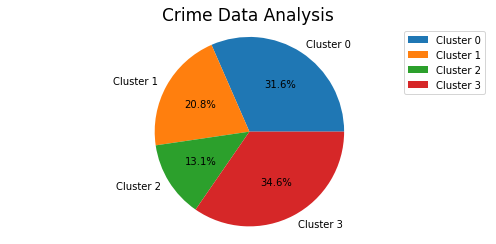

In [ ]:
# Creating Pie chart for visualization on the basis of sum of mean of all the crimes

labels=['Cluster 0','Cluster 1','Cluster 2','Cluster 3']
Total= Crime_cluster['Total']

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

plt.pie(Total,labels=labels,radius = 2,autopct='%0.1f%%');
plt.title("Crime Data Analysis", fontsize = 17)
plt.legend( loc="upper right")
plt.axis('equal')

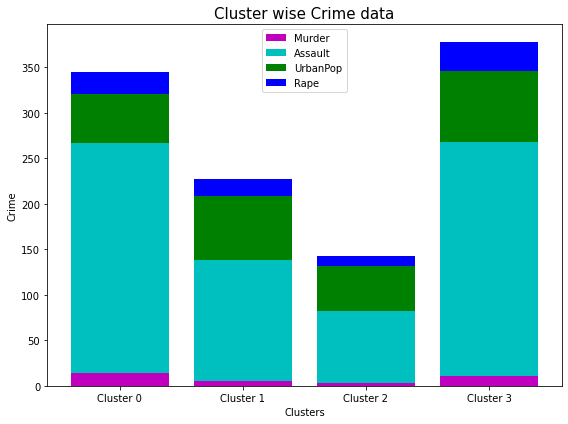

In [ ]:
# Cluster wise visulaization on a stacked bar

x = ['Cluster 0','Cluster 1','Cluster 2','Cluster 3']
y1 = np.array(Crime_cluster['Murder'])
y2 = np.array(Crime_cluster['Assault'])
y3 = np.array(Crime_cluster['UrbanPop'])
y4 = np.array(Crime_cluster['Rape'])

plt.figure(figsize=(8,6))
plt.bar(x, y1,color = 'm')
plt.bar(x, y2, bottom=y1, color ='c')
plt.bar(x, y3, bottom =y1+y2, color ='g')
plt.bar(x, y4,bottom =y1+y2+y3, color ='b')

plt.xlabel("Clusters")
plt.ylabel("Crime")
plt.legend(["Murder", "Assault", "UrbanPop", "Rape"])
plt.title("Cluster wise Crime data", fontsize = 15)
plt.show()

In [ ]:
data.to_csv("Crime_data_HClustering.csv",index=False, encoding='utf-8') # creating a csv file with cluster segmentation in csv format

In [ ]:
import os # Checking the path of the csv file created
os.getcwd()

'C:\\Users\\Karuna Singh\\360 DigitMg'